In [1]:
import LEGENDPlotStyle as lps

import os
import math
import uproot
import random
import argparse
import opanalysis_v3 as opanalysis
import numpy as np
import pandas as pd
#import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LogNorm, Normalize

path = "/lfs/l1/legend/users/cbarton/simulations/campaigns/opmapprocessing/24-12-08-Ar41+H2-SmallMod-momentumfixed/output"
files = sorted(os.listdir(path))[0:]

ar40_df = pd.DataFrame()
ar40_dflid = pd.DataFrame()

#For testing
files = files[0:20]
print(files)

['ArCapSims.root', 'appliedmap0.root', 'appliedmap1.root', 'appliedmap10.root', 'appliedmap11.root', 'appliedmap12.root', 'appliedmap13.root', 'appliedmap14.root', 'appliedmap15.root', 'appliedmap16.root', 'appliedmap17.root', 'appliedmap18.root', 'appliedmap19.root', 'appliedmap2.root', 'appliedmap20.root', 'appliedmap21.root', 'appliedmap22.root', 'appliedmap23.root', 'appliedmap24.root', 'appliedmap25.root']


In [2]:
#Consider doing separate isotope analyses
tmp_df = pd.DataFrame()
tmp_dflid = pd.DataFrame()
for file in tqdm(files):
    try:
        tf = uproot.open(os.path.join(path, file))["panelhits"]
        tmp_df = pd.DataFrame()
        tmp_df["EventID"]  = tf["EventID"].array(library="np")
        tmp_df["sector"]   = tf["sector"].array(library="np")
        tmp_df["panel"]    = tf["panel"].array(library="np")
        tmp_df["zband"]    = tf["zband"].array(library="np")
        tmp_df["time"]     = tf["time"].array(library="np")
        
        tflid = uproot.open(os.path.join(path, file))["lidhits"]
        tmp_dflid = pd.DataFrame()
        tmp_dflid["EventID"]  = tflid["EventID"].array(library="np")
        tmp_dflid["sector"]   = tflid["sector"].array(library="np")
        tmp_dflid["panel"]    = tflid["panel"].array(library="np")
        tmp_dflid["zband"]    = tflid["xband"].array(library="np")
        tmp_dflid["time"]     = tflid["time"].array(library="np")
        
    except:
        print(f"skipping {file}")
    
    ar40_df = pd.concat([tmp_df, ar40_df])
    ar40_dflid = pd.concat([tmp_dflid, ar40_dflid])

ar40_df77 = pd.DataFrame()
ar40_dflid77 = pd.DataFrame()

ge77_only = 0

#
#Important: ge77_events.txt needs to be regenerated for the new results
#

if ge77_only == 1:
    ge77_events = []
    with open('ge77_events.txt') as f:
        lines = f.readlines()
        for l in lines:
            ge77_events.append(int(l)-1)
    ar40_df77 = ar40_df[np.isin(ar40_df.EventID, ge77_events)]
    ar40_dflid77 = ar40_dflid[np.isin(ar40_dflid.EventID, ge77_events)] #Forgot to include this at first
    
#ar40_dflid['panel']=ar40_dflid['panel']+24

#if ge77_only == 1:
#    ar40_dflid77['panel']=ar40_dflid77['panel']+24

'''
This line looks a bit complicated, but it's mostly type manipulation
The.EventID.unique() returns a numpy array, but sorted() converts it to a list
Converting to a set drops duplicate values, then we convert back to a list
We could probably work with the set instead
but eh, whatever, it's just one extra operation
The real runtime killer here is loading the data, which is unavoidable
'''
evt_list = list(set(sorted(ar40_df.EventID.unique())+sorted(ar40_dflid.EventID.unique())))

if ge77_only == 1:
    evt_list = list(set(sorted(ar40_df77.EventID.unique())+sorted(ar40_dflid77.EventID.unique())))

total_nof_ar40_events = len(evt_list)

print(total_nof_ar40_events)

if(ge77_only == 0):
    print(ar40_df)
if(ge77_only == 1):
    print(ar40_df77)



  0%|          | 0/20 [00:00<?, ?it/s]

skipping ArCapSims.root
16847
        EventID  sector  panel  \
0         22175       2     13   
1         22175       2     14   
2         22175       2     15   
3         22175       2     16   
4         22175       3     14   
...         ...     ...    ...   
308340      886       8     18   
308341      886       8     19   
308342      886       8     20   
308343      886       8     21   
308344      886       8     22   

                                                    zband      time  
0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.000280  
1       [0, 1, 1, 1, 1, 1, 3, 2, 4, 2, 1, 0, 0, 4, 1, ...  0.000280  
2       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, ...  0.000280  
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.000280  
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.000280  
...                                                   ...       ...  
308340  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.001368  
3

In [ ]:
path = ""
files = sorted(os.listdir(path))[1:]

ar39_df = pd.DataFrame()
ar39_dflid = pd.DataFrame()

#For testing
files = files[0:10]

for file in tqdm(files):
    try:
        tf = uproot.open(os.path.join(path, file))["panelhits"]
    
        tmp_df = pd.DataFrame()
        tmp_df["EventID"]  = tf["EventID"].array(library="np")
        tmp_df["sector"]   = tf["sector"].array(library="np")
        tmp_df["panel"]    = tf["panel"].array(library="np")
        tmp_df["zband"]    = tf["zband"].array(library="np")
        tmp_df["time"]     = tf["time"].array(library="np")
        
        tflid = uproot.open(os.path.join(path, file))["lidhits"]
    
        tmp_dflid = pd.DataFrame()
        tmp_dflid["EventID"]  = tflid["EventID"].array(library="np")
        tmp_dflid["sector"]   = tflid["sector"].array(library="np")
        tmp_dflid["panel"]    = tflid["panel"].array(library="np")
        tmp_dflid["zband"]    = tflid["xband"].array(library="np")
        tmp_dflid["time"]     = tflid["time"].array(library="np")
        
    except:
        print(f"skipping {file}")
    
    ar39_df = pd.concat([tmp_df, ar39_df])
    ar39_dflid = pd.concat([tmp_dflid, ar39_dflid])
    
#evt_list = sorted(ar39_df.EventID.unique()) #Old
evt_list = list(set(sorted(ar39_df.EventID.unique())+sorted(ar39_dflid.EventID.unique())))
print(len(evt_list))
ar39_events_simulated = len(evt_list)

In [3]:
# random number of colors and markers
# different (color, marker) combination for different number of light guides per panel
marker = ["o", "s", "d", "^", "v", "*", "P", "+", "x"]
color = [lps.colors['legend_blue'], lps.colors['legend_green'], lps.colors['legend_orange'], lps.colors['legend_violet'], lps.colors['legend_darkblue']]

ar41_rate = opanalysis.get_muon_rate() * 97910/12000000

n_bar = 12
eff = .005

plt.figure(figsize = (8,6))

residual_space, slices, guide_position = opanalysis.get_guides(300, 10, n_bar)

PE_threshold_list = np.arange(0, 16, 1)

<Figure size 800x600 with 0 Axes>

In [4]:
if(ge77_only==0):
    sliced_df_41 = opanalysis.slicing(ar40_df, 300, n_bar, 10, eff, .00001)
    sliced_df_41lid = opanalysis.slicing(ar40_dflid, 52, 3, 10, eff, .00001)
if(ge77_only==1):
    sliced_df_41 = opanalysis.slicing(ar40_df77, 300, n_bar, 10, eff, .00001)
    sliced_df_41lid = opanalysis.slicing(ar40_dflid77, 52, 3, 10, eff, .00001)
#print(ar40_df)
print(sliced_df_41)

/home/cbarton/py/opanalysis_v3.py:255: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bin_start = round(dx[1].iloc[0][4],6)
/home/cbarton/py/opanalysis_v3.py:259: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(rowe[4] > bin_end):
/home/cbarton/py/opanalysis_v3.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bin_start = round(rowe[4],6)
/home/cbarton/py/opanalysis_v3.py:255: FutureWarning: Series.__getitem__ treating keys as p

EventID  panel  time_bin            
0        8      [0.000485, 0.000495]    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
         9      [0.000485, 0.000495]    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, ...
         10     [0.000485, 0.000495]    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, ...
         11     [0.000485, 0.000495]    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
         12     [0.000485, 0.000495]    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                                              ...                        
23061    1      [0.000859, 0.000869]    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
         2      [0.000859, 0.000869]    [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, ...
         3      [0.000859, 0.000869]    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
         4      [0.000859, 0.000869]    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
         12     [0.000859, 0.000869]    [0, 0, 0, 0, 0, 0, 0, 0

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

CPU times: user 1min 3s, sys: 552 ms, total: 1min 4s
Wall time: 1min 4s


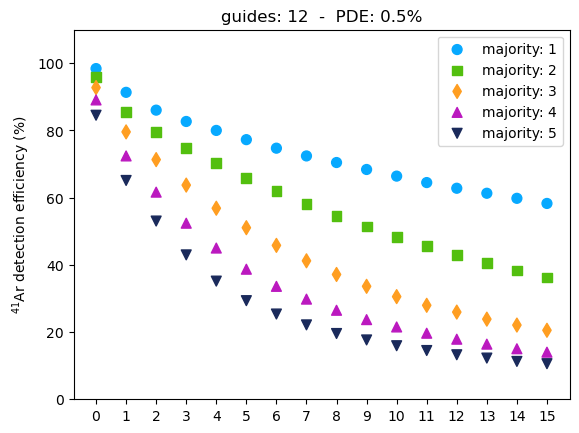

In [5]:
%%time

#I guess this line removes some warning message that I don't like
#pd.options.mode.chained_assignment = None

'''
The original idea behind making the retrieve_ar39_events method was to iteratively assign the number of associated Ar39 for each muon event,
based on the number of time windows in that event. Therefore, the retrieve_ar39_events method only returns one muon's worth of Ar39.

For each unique ID in the above_majority_41 list, get the number of time_bins, and use that to generate the correct number of associated Ar39
Currently, hydrogen is included automatically in the analysis, but can be disabled easily.

Update: instead of retrieving 10us*X Ar39 at once, it's more correct to retrieve 10 us windows X times. But also, we've decided it's better
to do analysis on the Ar39 separately from the Ar41+Ar39+H2.
'''

#sliced_df_41 = opanalysis.slicing(ar40_df, 300, n_bar, 10, eff, .00001)
#sliced_df_41lid = opanalysis.slicing(ar40_dflid, 52, 3, 10, eff, .00001)
    
# loop over different PE threshold on single light guide
for PE_threshold in tqdm(PE_threshold_list):
    
    multiplicity_list = [1,2,3,4,5]
    
    #Apply the PE threshold
    PE_thr_applied_41 = sliced_df_41.apply(lambda d: [a for a in d if a > PE_threshold])
    PE_thr_applied_41lid = sliced_df_41lid.apply(lambda d: [a for a in d if a > PE_threshold])

    #Drop empty rows
    PE_thr_applied_41 = PE_thr_applied_41[PE_thr_applied_41.apply(len) > 0]
    PE_thr_applied_41lid = PE_thr_applied_41lid[PE_thr_applied_41lid.apply(len) > 0]
    
    #Concat the dataframes together
    PE_thr_applied_41new = pd.concat([PE_thr_applied_41,PE_thr_applied_41lid],axis=1,ignore_index = True)
    
    '''
    Unfortunately, the dataframes' zbands don't combine automatically
    So, when the dfs are concatenated, we end up with two half-columns of zbands
    The first ~half of the df's rows has correct values in the first column, and NaNs in the second column
    Similarly, the second half of the df's rows has NaN's in the first column, and correct values in the second column
    So in a stupid way, we loop once through the dataframe and copy over all NaN values in the first column
    We do this by checking if the type of the second column is a list (NaN is considered a float type)
    If it is, we copy the second column's list over the first column's NaN
    In the end, we still have two zband columns - one complete column with all the correct lists,
    and then a vestigial half-column left over from the copying.
    The half-column is removed in the 'groupby' line.
    '''
    a = [0,2]
    for idx, i in PE_thr_applied_41new.iterrows():
        if(type(i[1])==type(a)):
            #print(i[1])
            i[0] = i[1]

    #Use this for the strictest definition of time windowing - needs improvement
    #PE_thr_applied_41new = PE_thr_applied_41new[0].groupby(['EventID','time_bin']).sum()
    #Use this for the most lenient definition of time windowing i.e. all hits in a single event are summed with no loss
    PE_thr_applied_41new = PE_thr_applied_41new[0].groupby(['EventID']).sum()
    
    # loop over different multiplicity conditions
    for M_idx, M in enumerate(tqdm(multiplicity_list)):
        
        #Consider checking number of light guides triggered in each time window
        
        # Majority condition (M = 1 means "single light guide trigger" which corresponds to the case no majority activated)  
        above_majority_41 = PE_thr_applied_41new.apply(lambda d: len(d) >= M)
        
        #Drop rows which didn't pass the majority condition
        above_majority_41 = above_majority_41[above_majority_41==True]
        
        #At this point, above_majority contains a column of booleans for the previous cut, so we just sum the column
        #Edit: doing it this way does not account for the same event triggering multiple detections
        #So, we go back to the old way of doing it
        #Leaving the incorrect way of doing it here for legacy purposes
        #detected_41 = above_majority_41.sum()
        detected_41 = len(above_majority_41.index.get_level_values(0).unique())
        
        '''
        Ar39 analysis will be moved to a separate script, or at the very least, a separate cell, when the time is appropriate
        efficiency_counter = 0        
        ar39_used = 0
        ar39_events = pd.DataFrame()
        ar39_event = pd.DataFrame()
        
        #I find it easier to work with a dataframe than a multi-indexed series
        am = pd.DataFrame()
        am['EventID'] = above_majority_41.index.get_level_values(0)
        am['time_bin'] = above_majority_41.index.get_level_values(1)
        am = am.groupby(['EventID']).count()
        
        for nwindows in tqdm(am['time_bin'].values): #For each event, with nwindows being the number of unique time windows (slices)  
            
            #First, retrieve a number of Ar39 events corresponding to the number of time windows in the associated Ar41 event

            #Change this from 10us*nwindows to 10us nwindows times
            for nw in range(nwindows):
                
                ar39_events = pd.concat([opanalysis.retrieve_ar39_events(ar39_df, evt_list, 1e-5),ar39_events])
            
            #Then, the usual cuts
            sliced_df_39 = opanalysis.slicing(ar39_events, 300, n_bar, 10, eff)#Apply light guide geometry, detection efficiency
                                                                    #DO NOT set a time window for the Ar39 events!
            PE_thr_applied_39 = sliced_df_39.apply(lambda d: [a for a in d if a > PE_threshold])#Apply PE threshold
            # Majority condition (M = 1 means "single light guide trigger" which corresponds to the case no majority activated)            
            
            above_majority_39 = PE_thr_applied_39[PE_thr_applied_39.apply(lambda d: len(d) >= M)]
            detected_39 = len(above_majority_39.index.get_level_values(0).unique())
            
            if detected_39 > 0:
                efficiency_counter += 1
            ar39_used += 1
        '''
        
        # this is to put the label only once
        label = None
        if PE_threshold == (1):
            label = f"majority: {M}"
        
        ar41_efficiency = detected_41 / total_nof_ar40_events * 100
        
        plt.scatter(PE_threshold, ar41_efficiency, marker = marker[M_idx], color = color[M_idx], label = label, linestyle = "", s = 50)
        plt.ylabel("$^{41}$Ar detection efficiency (%)")
        plt.xticks(PE_threshold_list)
        plt.yscale("linear")
        plt.ylim([0, 1.1e2])
        plt.grid(axis='y')

plt.title(f"guides: {n_bar}  -  PDE: {eff*100}%")            
plt.legend()

In [ ]:
pd.options.mode.chained_assignment = None
PE_threshold = 1
efficiency_counter = 0
M = 2

sliced_df_41 = pd.concat([sliced_df_41,sliced_df_41lid],axis=0,ignore_index = True)
sliced_df_41.sort_values()#by=['EventID'])
print(sliced_df_41)

#PE_thr_applied_41 = sliced_df_41.apply(lambda d: [a for a in d if a > PE_threshold])
#PE_thr_applied_41lid = sliced_df_41lid.apply(lambda d: [a for a in d if a > PE_threshold])

#Combine before mult cut
#Pe_thr_applied_41both = pd.concat([PE_thr_applied_41,PE_thr_applied_41lid],axis=0,ignore_index = True)
#Pe_thr_applied_41both.sort_values(by=['EventID'])


# Majority condition (M = 1 means "single light guide trigger" which corresponds to the case no majority activated)
above_majority_41 = PE_thr_applied_41both[PE_thr_applied_41both.apply(lambda d: len(d) >= M)]
detected_41 = len(above_majority_41both.index.get_level_values(0).unique())
#above_majority_41lid = PE_thr_applied_41lid[PE_thr_applied_41lid.apply(lambda d: len(d) >= M)]
#detected_41lid = len(above_majority_41lid.index.get_level_values(0).unique())

print(above_majority_41)
#Contains EventID, panel, time_bin, and an unlabeled object which contains the number of PEs in each valid panel
#I don't know how to access the last number yet...

am = pd.DataFrame()
am['EventID'] = above_majority_41.index.get_level_values(0)
am['panel'] = above_majority_41.index.get_level_values(1)
am['time_bin'] = above_majority_41.index.get_level_values(2)
#am['band'] = above_majority_41.index.get_level_values(3)

amlid = pd.DataFrame()
amlid['EventID'] = above_majority_41lid.index.get_level_values(0)
amlid['panel'] = above_majority_41lid.index.get_level_values(1)
amlid['time_bin'] = above_majority_41lid.index.get_level_values(2)
#amlid['band'] = above_majority_41lid.index.get_level_values(3)

evtlist = list(am['EventID'].unique())
#print(evtlist)


panelevts = 0
paneltimes = above_majority_41.index.get_level_values(2)
lidtimes = above_majority_41lid.index.get_level_values(2)
#print(lidtimes)

#for index, row in am.iterrows():
    #amlid = amlid[amlid.EventID == row['EventID']]
    #print(row['EventID'])
    #print(amlid)
    
#am = am.groupby(['EventID']).count()
#amlid = amlid.groupby(['EventID'])#.count()
#print(amlid)

ammega = pd.concat([am,amlid],axis=0,ignore_index = True)
ammega.sort_values(by=['EventID'])
print(ammega)
#print(am)
ammega = ammega.drop_duplicates()
print(ammega)
#At this point, we have the panels and hits combined, and sorted by EventID, but there's one last problem
#We need to do this combining BEFORE the majority cut
#Otherwise, the majority cut will apply to the panels and the lid separately, which is inaccurate
#Looking at the structure of each subsequent dataframe, we have something like this:

#sliced_df: Just the sliced df, with each slice still containing the full xband/zband, zeroes included
#PE_thr_applied: Looks like previous, but band info is empty for things which don't pass cut, single-valued otherwise
#above_majority: empty-banded rows are gone, singled values are now in a list together, unsure how to access list

#I think the next task is to clear the empty bands BEFORE the majority cut, combine the two dataframes and do the
#Necessary manipulations, and then finally apply the majority cut


#for nwindows in am['time_bin'].values: #For each event, with nwindows being the number of unique time windows (slices)  

    #First, retrieve a number of Ar39 events corresponding to the number of time windows in the associated Ar41 event
    #ar39_events = opanalysis.retrieve_ar39_events(ar39_df, evt_list, 1e-5*nwindows)    
    #Then, the usual cuts
    #sliced_df_39 = opanalysis.slicing(ar39_events, 300, 12, 10, .001)#Apply light guide geometry, detection efficiency
                                                                    #DO NOT set a time window for the Ar39 events!
    #PE_thr_applied_39 = sliced_df_39.apply(lambda d: [a for a in d if a > PE_threshold])#Apply PE threshold
    # Majority condition (M = 1 means "single light guide trigger" which corresponds to the case no majority activated)
    #above_majority_39 = PE_thr_applied_39[PE_thr_applied_39.apply(lambda d: len(d) >= M)]
    #detected_39 = len(above_majority_39.index.get_level_values(0).unique())

    #if detected_39 > 0:
    #    efficiency_counter += 1


In [ ]:
pd.options.mode.chained_assignment = None
PE_threshold = 5
efficiency_counter = 0
M = 2

#sliced_df_41new = pd.concat([sliced_df_41,sliced_df_41lid],axis=1,ignore_index = True)
#sliced_df_41.sort_values()#by=['EventID'])
#print(sliced_df_41)
#print(sliced_df_41lid)
#print(sliced_df_41new)
#Result: the combined sliced_df is incorrect. Shows a bunch of NaN values for the second df added.

PE_thr_applied_41 = sliced_df_41.apply(lambda d: [a for a in d if a > PE_threshold])
PE_thr_applied_41lid = sliced_df_41lid.apply(lambda d: [a for a in d if a > PE_threshold])
#PE_thr_applied_41.dropna(subset=['EventID'], inplace=True) #Doesn't work

PE_thr_applied_41 = PE_thr_applied_41[PE_thr_applied_41.apply(len) > 0]
PE_thr_applied_41lid = PE_thr_applied_41lid[PE_thr_applied_41lid.apply(len) > 0]

PE_thr_applied_41new = pd.concat([PE_thr_applied_41,PE_thr_applied_41lid],axis=1,ignore_index = True)
a = [0,2]
for idx, i in PE_thr_applied_41new.iterrows():
    if(type(i[1])==type(a)):
        #print(i[1])
        i[0] = i[1]
        
PE_thr_applied_41new = PE_thr_applied_41new[0].groupby(['EventID','time_bin']).sum()

#PE_thr_applied_41new[0].name = "ZERO"
#PE_thr_applied_41new.rename({0:'one'},axis='columns')
#print(PE_thr_applied_41new)
#PE_thr_applied_41new.drop(['one'])
#PE_thr_applied_41new.drop(PE_thr_applied_41new.1)
#print(PE_thr_applied_41new.columns.names)
#print(type(PE_thr_applied_41new))
#list(PE_thr_applied_41new.columns)
#PE_thr_applied_41new.head()
#ar40_df.head()
#print(PE_thr_applied_41new)
#print(PE_thr_applied_41new.columns[0]) #Better?
#PE_thr_applied_41new.drop([1])
#print(PE_thr_applied_41new)
above_majority_41 = PE_thr_applied_41new.apply(lambda d: len(d) >= M)
above_majority_41.rename('passmajority')
#print(above_majority_41)

#ped = pd.DataFrame()
#ped = PE_thr_applied_41new[0].groupby(['EventID','time_bin']).sum()
#print(ped)

#peds = ped.groupby(['EventID']).sum()#Almost right, but misses the time binning
#print(PE_thr_applied_41new)
#peds = ped.groupby(['EventID','time_bin']).sum()
#print(peds)
above_majority_41 = above_majority_41[above_majority_41==True]
print(above_majority_41)

am = pd.DataFrame()
am['EventID'] = above_majority_41.index.get_level_values(0)
am['time_bin'] = above_majority_41.index.get_level_values(1)
print(am)
am = am.groupby(['EventID']).count()
#print(am)
#for nwindows in tqdm(am['time_bin'].values):
#    print(nwindows)

In [ ]:
pd.options.mode.chained_assignment = None
PE_threshold = 1
efficiency_counter = 0
M = 2

#sliced_df_41new = pd.concat([sliced_df_41,sliced_df_41lid],axis=1,ignore_index = True)
#sliced_df_41.sort_values()#by=['EventID'])
#print(sliced_df_41)
#print(sliced_df_41lid)
#print(sliced_df_41new)
#Result: the combined sliced_df is incorrect. Shows a bunch of NaN values for the second df added.

PE_thr_applied_41 = sliced_df_41.apply(lambda d: [a for a in d if a > PE_threshold])
PE_thr_applied_41lid = sliced_df_41lid.apply(lambda d: [a for a in d if a > PE_threshold])
#PE_thr_applied_41.dropna(subset=['EventID'], inplace=True) #Doesn't work
PE_thr_applied_41 = PE_thr_applied_41[PE_thr_applied_41.apply(len) > 0]
PE_thr_applied_41lid = PE_thr_applied_41lid[PE_thr_applied_41lid.apply(len) > 0]
PE_thr_applied_41new = pd.concat([PE_thr_applied_41,PE_thr_applied_41lid],axis=0,ignore_index = True)
#PE_thr_applied_41new.columns[0].combine_first(PE_thr_applied_41new.columns[1])#Broken
PE_thr_applied_41new.index.name = 'header'
#print(PE_thr_applied_41)
#print(PE_thr_applied_41lid)
#print(PE_thr_applied_41new)
a = [0,2]
#for idx, i in PE_thr_applied_41new.iterrows():
    #if(type(i[1])==type(a)):
        #print(i[1])
        #i[0] = i[1]
#PE_thr_applied_41new[0].name = "ZERO"
#PE_thr_applied_41new.rename({0:'one'},axis='columns')
#print(PE_thr_applied_41new)
#PE_thr_applied_41new.drop(['one'])
#PE_thr_applied_41new.drop(PE_thr_applied_41new.1)
#print(PE_thr_applied_41new.columns.names)
#print(type(PE_thr_applied_41new))
#list(PE_thr_applied_41new.columns)
#PE_thr_applied_41new.head()
#ar40_df.head()
#print(PE_thr_applied_41new)
#print(PE_thr_applied_41new.columns[0]) #Better?
#PE_thr_applied_41new.rename({1:'ONE'},axis='columns')
#PE_thr_applied_41new.drop([1])
print(PE_thr_applied_41new)

In [ ]:
#print(sliced_df_41)
#sdf = pd.DataFrame([sliced_df_41])
#sdf.index = sdf.index.get_level_values(0)
#print(sdf)
#print(sdf.columns)
#print(type(sdf))
#print(sdf.columns.to_flat_index())#Good?

#ssdf = sdf.columns.to_flat_index()
#print(type(ssdf))

#i = 0
#print(sdf[1])
#for ele in sdf: #Almost
#    print(ele[0])
#    print(ele[2])
#    i = i+1
#    if i > 100:
#        break

#sdf = sliced_df_41.pd.to_frame
#print(type(sdf))
#s = pd.Series(["a", "b", "c"],name="vals")
#d = s.to_frame()
#print(type(d))